<a href="https://colab.research.google.com/github/PythonDSBook/notebooks/blob/main/Chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6章 ネットワークデータの分析

## 6.7 プログラミング

### コード 6.1 ライブラリのインポート

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### コード 6.2 グラフオブジェクトの作成とネットワークの可視化

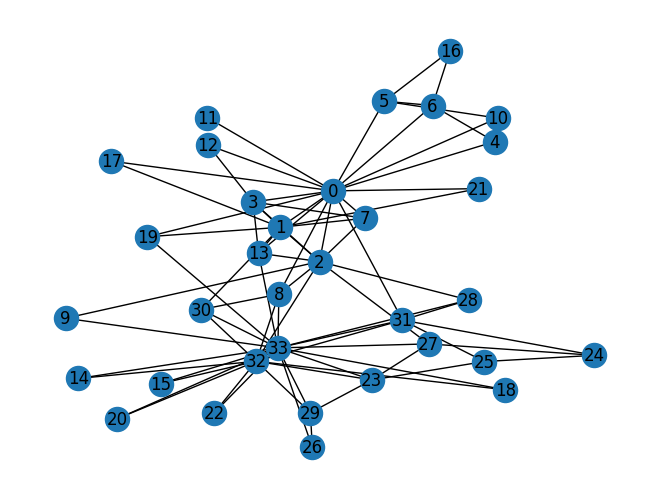

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)

### コード 6.3 ネットワークのノード数とエッジ数

In [3]:
print(len(G), G.size())

34 78


### コード 6.4 隣接行列の作成

In [4]:
adj_matrix = nx.to_numpy_array(G, dtype=int)
adj_matrix[adj_matrix > 0] = 1

In [5]:
adj_matrix

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

### コード 6.5 隣接リストの作成

In [6]:
adj_list = {}
for i in range(len(adj_matrix)):
  adj_list[i] = []
  for j in range(len(adj_matrix[i])):
      if adj_matrix[i][j] > 0:
        adj_list[i].append(j)

### コード 6.6 隣接リストの参照

In [7]:
adj_list[31]

[0, 24, 25, 28, 32, 33]

### コード 6.7 `deque`のインポート

In [8]:
from collections import deque

### プログラム 6.1 関数`bfs`

In [9]:
def bfs(adj_list, start_node):
  visited = []
  distances = {}
  for node in adj_list:
    distances[node] = np.inf
  visited.append(start_node)
  distances[start_node] = 0
  queue = deque([start_node])
  while queue:
    current_node = queue.popleft()
    for neighbor in adj_list[current_node]:
      if neighbor not in visited:
        visited.append(neighbor)
        distances[neighbor] = distances[current_node] + 1
        queue.append(neighbor)
  return distances

### コード 6.8 ネットワークのノード間の距離の計算

In [10]:
distances = bfs(adj_list, 0)
print(distances[22])

3


In [11]:
print(distances[28])

2


### コード 6.9 次数中心性、近接中心性、媒介中心性の計算

In [12]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
centrality_df = pd.DataFrame({
    '次数中心性': degree_centrality,
    '近接中心性': closeness_centrality,
    '媒介中心性': betweenness_centrality
})
centrality_df.sort_values('媒介中心性', ascending=False)

,次数中心性,近接中心性,媒介中心性
0,0.484848,0.568966,0.437635
33,0.515152,0.550000,0.304075
32,0.363636,0.515625,0.145247
2,0.303030,0.559322,0.143657
31,0.181818,0.540984,0.138276
8,0.151515,0.515625,0.055927
1,0.272727,0.485294,0.053937
13,0.151515,0.515625,0.045863
19,0.090909,0.500000,0.032475
5,0.121212,0.383721,0.029987


### プログラム 6.2 関数`eigenvector_centrality`

In [13]:
def eigenvector_centrality(adj_matrix, iterations):
  n = adj_matrix.shape[0]
  eigenvector = np.ones(n)
  for _ in range(iterations):
    eigenvector = np.dot(adj_matrix, eigenvector)
    eigenvector = eigenvector / np.sum(eigenvector)
  return eigenvector

### プログラム 6.3 関数`pagerank`

In [14]:
def pagerank(adj_matrix, alpha, iterations):
  n = adj_matrix.shape[0]
  adj_matrix[:, adj_matrix.sum(axis=0) == 0] = 1
  adj_matrix = adj_matrix / adj_matrix.sum(axis=0)
  matrix = alpha * adj_matrix + (1 - alpha) / n
  pr_vector = np.ones(n) / n
  for _ in range(iterations):
    pr_vector = np.dot(matrix, pr_vector)
  return pr_vector

### コード 6.10 関数`eigenvector_centrality`の実行

In [ ]:
eigenvector = eigenvector_centrality(adj_matrix, 100)
eigenvector_df = pd.DataFrame(eigenvector,
                                columns=["固有ベクトル中心性"])
eigenvector_df.sort_values(ascending=False,
                           by=["固有ベクトル中心性"])

In [16]:
eigenvector = eigenvector_centrality(adj_matrix, 100)
eigenvector_df = pd.DataFrame(eigenvector, columns=["固有ベクトル中心性"])
eigenvector_df.sort_values(ascending=False, by=["固有ベクトル中心性"])

,固有ベクトル中心性
33,0.075003
0,0.071413
2,0.063719
32,0.062002
1,0.053427
8,0.045682
13,0.045495
3,0.042423
31,0.038376
30,0.035106


### コード 6.11 関数`pagerank`の実行

In [ ]:
pr_vector = pagerank(adj_matrix, 0.85, 100)
pr_vector_df = pd.DataFrame(pr_vector,
                              columns=["ページランク"])
pr_vector_df.sort_values(ascending=False,
                         by=["ページランク"])

In [18]:
pr_vector = pagerank(adj_matrix, 0.85, 100)
pr_vector_df = pd.DataFrame(pr_vector, columns=["ページランク"])
pr_vector_df.sort_values(ascending=False, by=["ページランク"])

,ページランク
33,0.100919
0,0.096997
32,0.071693
2,0.057079
1,0.052877
31,0.037158
3,0.035860
23,0.031523
8,0.029766
13,0.029536
